**Lending Club Case Study**

We have the dataset as well as the data dictionary (DD) explaining the attributes. 
Using the data dictionary, segregate the columns into the two types of variables - categorical and continuous.






In [26]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#load the raw data
raw_data = pd.read_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\loan.csv', low_memory=False)

In [28]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [29]:
raw_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Columns in data1 and DD are compared. There are five columns given in data dictionary which are not present in dataset - fico_range_low, last_fico_range_high, last_fico_range_low, total_rev_hi_lim, verified_status_joint

Drop unwanted columns and rows

In [30]:
raw_data.isna().all().to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\loan_NaN.csv')

In [31]:
#Columns with full NaN values are not of any use for the analysis. These can be dropped.
nan_col = pd.read_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\loan_NaN.csv')

In [32]:
nan_col.columns = ['Col_name', 'NaN_Status']
nan_col.head()

,Col_name,NaN_Status
0,id,False
1,member_id,False
2,loan_amnt,False
3,funded_amnt,False
4,funded_amnt_inv,False


In [33]:
nan_col = nan_col[nan_col.NaN_Status==False]

In [34]:
nan_col.head()

,Col_name,NaN_Status
0,id,False
1,member_id,False
2,loan_amnt,False
3,funded_amnt,False
4,funded_amnt_inv,False


In [35]:
nan_col.Col_name.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [36]:
data1 = raw_data[nan_col.Col_name.to_list()]

New dataframe with only 57 columns which contain atleast one non NaN value is created from raw data

In [37]:
data1.info()
data1.to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [38]:
#Remove more than 50% null columns 
null_pc = data1.isnull().sum()/len(data1.index) * 100
col_to_drop = null_pc[null_pc>50].keys()
col_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [39]:
data1 = data1.drop(col_to_drop, axis=1) #3 columns dropped

In [40]:
#Drop the URL column
data1 = data1.drop('url', axis=1)

In [41]:
data1.shape #total 53 columns remain

(39717, 53)

In [42]:
#Drop columns with all zero / null values

zero_col = data1.max()
zero_col = zero_col[zero_col ==0].keys()
data1 = data1.drop(zero_col, axis=1)

data1.shape #total 48 columns remain

C:\Users\Kiran\AppData\Local\Temp\ipykernel_11016\3363081284.py:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zero_col = data1.max()


(39717, 48)

In [43]:
same_val = data1.nunique()
same_val = same_val[same_val ==1].keys()
data1 = data1.drop(same_val,axis=1)

data1.shape #total 44 columns remain

(39717, 44)

In [44]:
#Columns desc, purpose and title  represents same attribute and purpose is having more structured data. So, remaining two can be dropped

data1 = data1.drop(['desc','title'], axis=1)
data1.shape #total 42 columns remain

(39717, 42)

In [45]:
# zip_code can be dropped as it is partially masked and the purpose is served by addr_state column
data1 = data1.drop(['zip_code'], axis=1)
data1.shape #total 41 columns remain


(39717, 41)

In [46]:
data1.to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')

Standardise values

In [47]:
data1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [48]:
data1.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [49]:
#data1 = pd.read_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')

In [50]:
# Make term & int_rate as numeric values

data1.term = data1.term.str.replace(' months', '').astype(int)
data1.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [51]:
data1.int_rate.value_counts()
data1.int_rate = data1.int_rate.str.replace('%', '').astype(float)
data1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [52]:
#emp_length column have NaN values
data1.emp_length.isna().sum()

1075

In [53]:
#Replace NaN values in emp_length with 0
data1.emp_length = data1.emp_length.fillna(0)

In [54]:
data1.emp_length.isna().sum()

0

In [55]:
# emp_length column: remove <, + , 'years. <1 & 1 to be considered as single catorgy. Same for 10 & 10+

data1.emp_length.value_counts()
data1.emp_length = data1.emp_length.str.replace('years', '')
data1.emp_length = data1.emp_length.str.replace('year', '')
data1.emp_length = data1.emp_length.str.replace('<', '')
data1.emp_length = data1.emp_length.str.replace('+', '')


C:\Users\Kiran\AppData\Local\Temp\ipykernel_11016\2501710228.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1.emp_length = data1.emp_length.str.replace('+', '')


In [56]:
data1.emp_length = data1.emp_length.apply(pd.to_numeric)

In [57]:
data1.emp_length.describe()

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [58]:
#Remove % symbol from revol_util and make it numeric
data1.revol_util = data1.revol_util.str.replace('%', '').astype(float)
data1.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [59]:
data1.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp           

In [60]:
data1.to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')

Filtering

<Axes: >

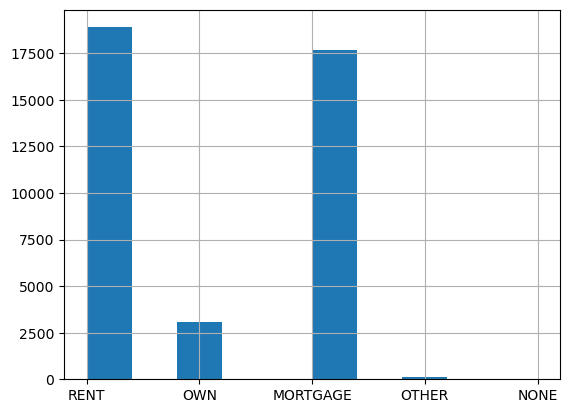

In [61]:
#Remove outliers -home ownership

data1.home_ownership.hist()

In [62]:
#OTHER & NONE are outliers, can be removed
data1.shape 
data1 = data1[~data1.home_ownership.isin(['OTHER','NONE'])]
data1.shape

(39616, 41)

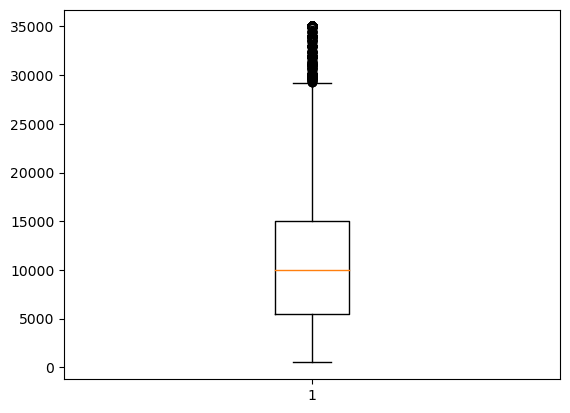

In [63]:
#Loan amount column analysis

plt.boxplot(data1.loan_amnt)
plt.show()

<Axes: >

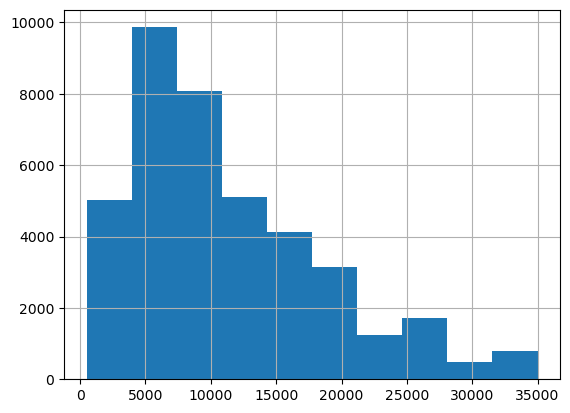

In [64]:
data1.loan_amnt.hist()

In [65]:
#Boxplot and histogram shows high loan amounts as outliers. But let us analyse the defaulter percentage for these higher amount loans


pd.pivot_table(data1, index='loan_amnt', columns='loan_status', aggfunc='count').head(10)

addr_state                     annual_inc                     \
loan_status Charged Off Current Fully Paid Charged Off Current Fully Paid   
loan_amnt                                                                   
500                 NaN     NaN        5.0         NaN     NaN        5.0   
700                 NaN     NaN        1.0         NaN     NaN        1.0   
725                 NaN     NaN        1.0         NaN     NaN        1.0   
750                 NaN     NaN        1.0         NaN     NaN        1.0   
800                 NaN     NaN        1.0         NaN     NaN        1.0   
900                 1.0     NaN        1.0         1.0     NaN        1.0   
950                 NaN     NaN        1.0         NaN     NaN        1.0   
1000               46.0     3.0      251.0        46.0     3.0      251.0   
1050                1.0     NaN        3.0         1.0     NaN        3.0   
1075                NaN     NaN        1.0         NaN     NaN        1.0   

            collection_recovery_fee                    delinq_2yrs  ...  \
loan_status             Charged Off Current Fully Paid Charged Off  ...   
loan_amnt                                                           ...   
500                             NaN     NaN        5.0         NaN  ...   
700                             NaN     NaN        1.0         NaN  ...   
725                             NaN     NaN        1.0         NaN  ...   
750                             NaN     NaN        1.0         NaN  ...   
800                             NaN     NaN        1.0         NaN  ...   
900                             1.0     NaN        1.0         1.0  ...   
950                             NaN     NaN        1.0         NaN  ...   
1000                           46.0     3.0      251.0        46.0  ...   
1050                            1.0     NaN        3.0         1.0  ...   
1075                            NaN     NaN        1.0         NaN  ...   

            total_rec_int total_rec_late_fee                     \
loan_status    Fully Paid        Charged Off Current Fully Paid   
loan_amnt                                                         
500                   5.0                NaN     NaN        5.0   
700                   1.0                NaN     NaN        1.0   
725                   1.0                NaN     NaN        1.0   
750                   1.0                NaN     NaN        1.0   
800                   1.0                NaN     NaN        1.0   
900                   1.0                1.0     NaN        1.0   
950                   1.0                NaN     NaN        1.0   
1000                251.0               46.0     3.0      251.0   
1050                  3.0                1.0     NaN        3.0   
1075                  1.0                NaN     NaN        1.0   

            total_rec_prncp                    verification_status          \
loan_status     Charged Off Current Fully Paid         Charged Off Current   
loan_amnt                                                                    
500                     NaN     NaN        5.0                 NaN     NaN   
700                     NaN     NaN        1.0                 NaN     NaN   
725                     NaN     NaN        1.0                 NaN     NaN   
750                     NaN     NaN        1.0                 NaN     NaN   
800                     NaN     NaN        1.0                 NaN     NaN   
900                     1.0     NaN        1.0                 1.0     NaN   
950                     NaN     NaN        1.0                 NaN     NaN   
1000                   46.0     3.0      251.0                46.0     3.0   
1050                    1.0     NaN        3.0                 1.0     NaN   
1075                    NaN     NaN        1.0                 NaN     NaN   

                        
loan_status Fully Paid  
loan_amnt               
500                5.0  
700                1.0  
725                1.0 

In [66]:
#Loans less than 1000 are outliers with only 1 chargedoff case. These can be removed

data1[data1.loan_amnt <1000].loan_status

data1 = data1[data1.loan_amnt >=1000]

data1.shape

(39604, 41)

In [67]:
data1.to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')

In [68]:
#High loan amounts have significat number of defaulters. So it cannot be treated as outliers
pd.pivot_table(data1, index='loan_amnt', columns='loan_status', aggfunc='count').tail(25)

addr_state                     annual_inc                     \
loan_status Charged Off Current Fully Paid Charged Off Current Fully Paid   
loan_amnt                                                                   
31725               NaN     NaN        1.0         NaN     NaN        1.0   
31800               NaN     NaN        1.0         NaN     NaN        1.0   
31825               2.0     NaN        6.0         2.0     NaN        6.0   
32000               6.0     2.0       24.0         6.0     2.0       24.0   
32250               NaN     NaN        1.0         NaN     NaN        1.0   
32275               NaN     1.0        NaN         NaN     1.0        NaN   
32350               2.0     1.0        NaN         2.0     1.0        NaN   
32400               1.0     NaN        2.0         1.0     NaN        2.0   
32500               NaN     NaN        2.0         NaN     NaN        2.0   
32525               NaN     NaN        1.0         NaN     NaN        1.0   
32775               NaN     NaN        1.0         NaN     NaN        1.0   
32875               NaN     1.0        1.0         NaN     1.0        1.0   
33000               2.0     NaN       10.0         2.0     NaN       10.0   
33250               NaN     NaN        1.0         NaN     NaN        1.0   
33425               1.0     NaN        1.0         1.0     NaN        1.0   
33500               1.0     NaN        1.0         1.0     NaN        1.0   
33600               NaN     2.0        4.0         NaN     2.0        4.0   
33950               2.0     1.0        6.0         2.0     1.0        6.0   
34000               2.0     2.0       11.0         2.0     2.0       11.0   
34200               NaN     NaN        1.0         NaN     NaN        1.0   
34475               1.0     NaN        4.0         1.0     NaN        4.0   
34525               NaN     NaN        1.0         NaN     NaN        1.0   
34675               NaN     NaN        1.0         NaN     NaN        1.0   
34800               NaN     NaN        2.0         NaN     NaN        2.0   
35000             150.0    78.0      451.0       150.0    78.0      451.0   

            collection_recovery_fee                    delinq_2yrs  ...  \
loan_status             Charged Off Current Fully Paid Charged Off  ...   
loan_amnt                                                           ...   
31725                           NaN     NaN        1.0         NaN  ...   
31800                           NaN     NaN        1.0         NaN  ...   
31825                           2.0     NaN        6.0         2.0  ...   
32000                           6.0     2.0       24.0         6.0  ...   
32250                           NaN     NaN        1.0         NaN  ...   
32275                           NaN     1.0        NaN         NaN  ...   
32350                           2.0     1.0        NaN         2.0  ...   
32400                           1.0     NaN        2.0         1.0  ...   
32500                           NaN     NaN        2.0         NaN  ...   
32525                           NaN     NaN        1.0         NaN  ...   
32775                           NaN     NaN        1.0         NaN  ...   
32875                           NaN     1.0        1.0         NaN  ...   
33000                           2.0     NaN       10.0         2.0  ...   
33250                           NaN     NaN        1.0         NaN  ...   
33425                           1.0     NaN        1.0         1.0  ...   
33500                           1.0     NaN        1.0         1.0  ...   
33600                           NaN     2.0        4.0         NaN  ...   
33950                           2.0     1.0        6.0         2.0  ...   
34000                           2.0     2.0       11.0         2.0  ...   
34200                           NaN     NaN        1.0         NaN  ...   
34475                           1.0     NaN        4.0         1.0  ...   
34525                           NaN     NaN        1.0  

Univariate analysis

In [69]:
#How loans are distributed based on the amount disbursed
loan_amt_dist = data1.groupby('loan_amnt').loan_amnt.count()
loan_amt_dist

loan_amnt
1000     300
1050       4
1075       1
1100       5
1125       1
        ... 
34475      5
34525      1
34675      1
34800      2
35000    679
Name: loan_amnt, Length: 878, dtype: int64

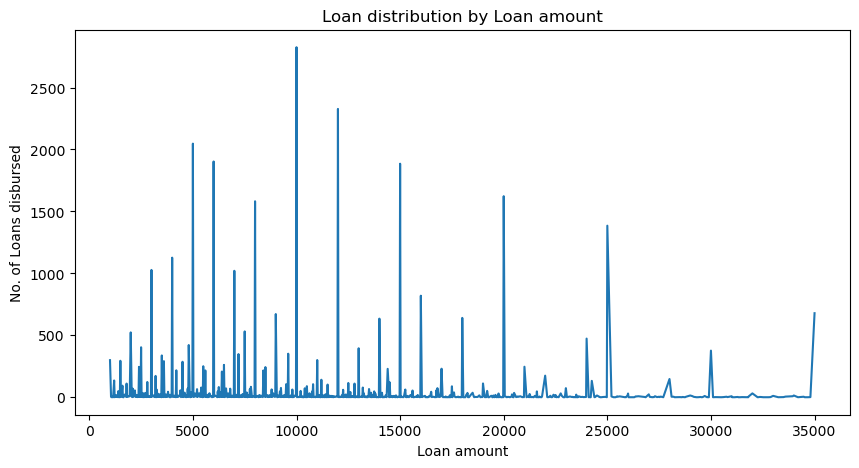

In [200]:
x = loan_amt_dist.index.tolist()
y = loan_amt_dist.values.tolist()

# set figure size
plt.figure(figsize=(10, 5))

# set title
plt.title('Loan distribution by Loan amount')

# set axis labels
plt.xlabel('Loan amount')
plt.ylabel('No. of Loans disbursed')


plt.plot(x, y)

People are borrowing rounded amounts, mainly multiples of 1000s

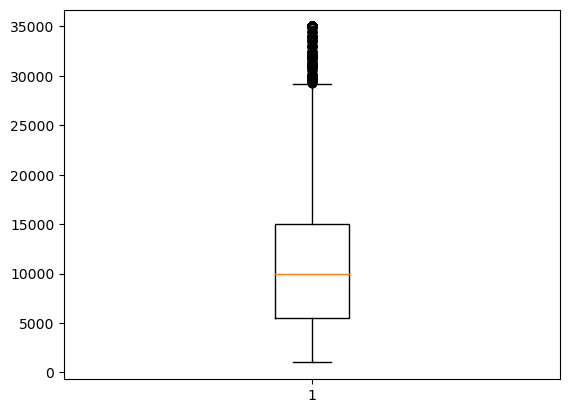

In [71]:
plt.boxplot(data1.loan_amnt)
plt.show()

In [202]:
#% of defaulters out of total
avg_defaulters = data1.groupby('loan_status').loan_status.count()
avg_defaulters.head()
avg_defaulters['Total'] = avg_defaulters.sum()

In [203]:
avg_defaulters_pc = (avg_defaulters/avg_defaulters.Total)*100
avg_defaulters_pc =avg_defaulters_pc[:-1]
avg_defaulters_pc

loan_status
Charged Off    14.160186
Current         2.878497
Fully Paid     82.961317
Name: loan_status, dtype: float64

<BarContainer object of 3 artists>

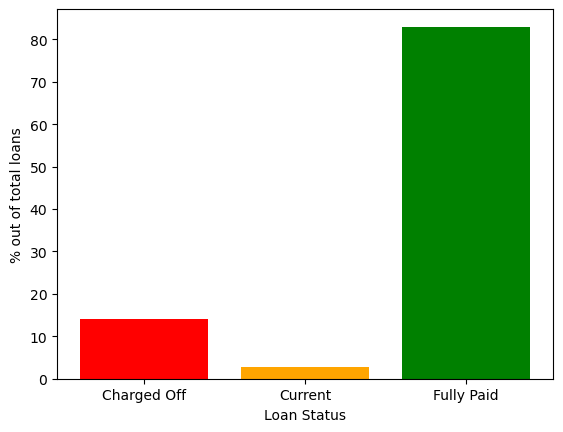

In [204]:
x = avg_defaulters_pc.index.tolist()
y = avg_defaulters_pc.values.tolist()

plt.xlabel('Loan Status')
plt.ylabel('% out of total loans')
plt.bar(x,y,color=['red', 'orange', 'green'])

50% of loans are of amount ranging between 5000 and 15000

In [131]:
#Create a business driven derived metric using this - >15000 are high value loans and <15000 as low value loans

data1['loan_value'] = data1.loan_amnt.apply(lambda x: 'high' if x >=15000 else 'low')

data1.loan_value.describe()

count     39604
unique        2
top         low
freq      28536
Name: loan_value, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x26bd83cc8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26bd83cedd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26bd555cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x26bd5474e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x26bd850f990>],
 'means': []}

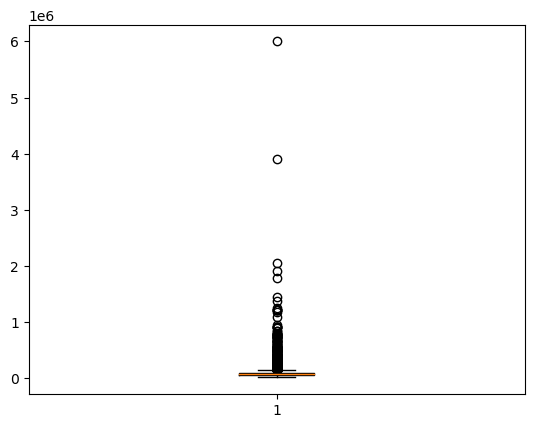

In [73]:
#Categorise based on income of customer

plt.boxplot(data1.annual_inc)

Annual income varies between 4000 to 60 lakhs which is a huge variance and difficult for analysis. Let us group the customers into 3 catogries:
1. low_inc  = < 5 lakhs
2. mid_inc = Between 5 & 10 lakhs
3. high_inc = > 10 lakhs

In [130]:
#Type driven derived variable
data1['inc_type'] = data1.annual_inc.apply(lambda x: 'high_inc' if x >=1000000 else ('mid_inc' if x>=500000 else 'low_inc'))

data1.inc_type.describe()

count       39604
unique          3
top       low_inc
freq        39533
Name: inc_type, dtype: object

In [132]:
#Data driven derived metric -pay ratio:  ratio of total payable amount to loan amount
data1['pay_ratio'] = (data1.term * data1.installment) / data1.loan_amnt

data1.pay_ratio.describe()

count    39604.000000
mean         1.226570
std          0.151450
min          0.113166
25%          1.142801
50%          1.202700
75%          1.279410
max          1.740050
Name: pay_ratio, dtype: float64

In [133]:
data1.to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')

Segmented univariate analysis

In [206]:

#How loan portfolio is distributed against loan status
loan_stat = pd.pivot_table(data1, index='loan_status', aggfunc='mean')

C:\Users\Kiran\AppData\Local\Temp\ipykernel_11016\3955493850.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  loan_stat = pd.pivot_table(data1, index='loan_status', aggfunc='mean')


In [207]:
loan_stat

,annual_inc,collection_recovery_fee,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,...,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,62433.061883,87.533375,0.169936,14.002940,5.202045,11750.285307,10870.574404,698917.718795,1.057061,335.882685,...,672.302355,13512.401926,55.607870,46.266762,21.425820,6836.352767,6369.099296,2195.938197,4.299833,3963.812338
Current,75430.665105,0.000000,0.141228,14.750009,6.152095,16485.701754,16318.265247,911656.866667,0.783333,395.476061,...,0.000000,16530.893860,53.204482,60.000000,23.313158,21852.875561,21582.041684,7150.753254,1.172878,14700.949465
Fully Paid,69868.070478,0.000000,0.142227,13.155016,5.041528,10625.195550,10124.702791,673588.556154,0.839542,320.250852,...,0.000000,13257.154553,47.549635,41.172389,22.165358,12734.366835,12123.444918,2108.316409,0.861300,10625.189228


<Axes: xlabel='loan_status'>

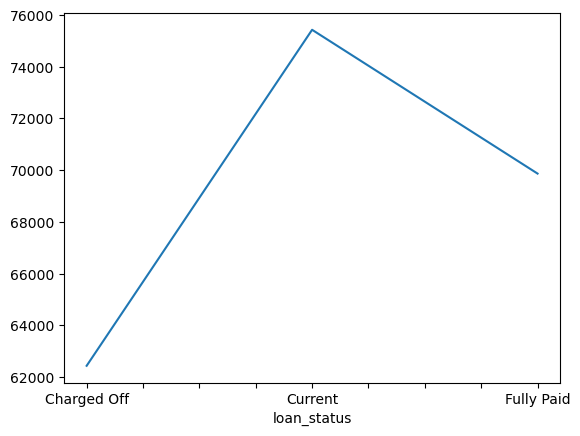

In [78]:
# Average annual income of borrowers Vs loan status
loan_stat.annual_inc.plot()

Observation: avg annual income of defaulters are mainly less than 65000


<Axes: xlabel='loan_status'>

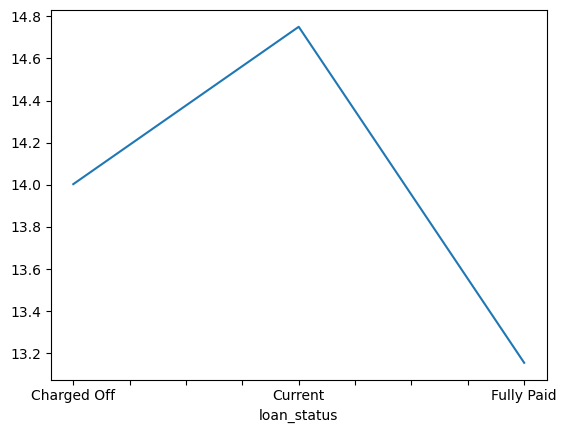

In [209]:
# Average debt to income ratio of borrowers Vs loan status
loan_stat.dti.plot() # Debt to income ratio - calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

<Axes: xlabel='loan_status'>

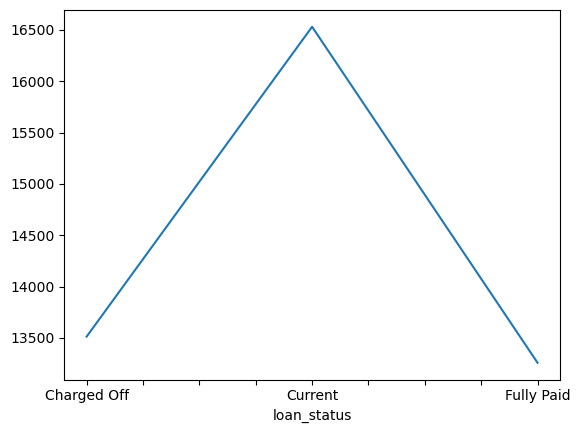

In [80]:
loan_stat.revol_bal.plot()

<Axes: xlabel='loan_status'>

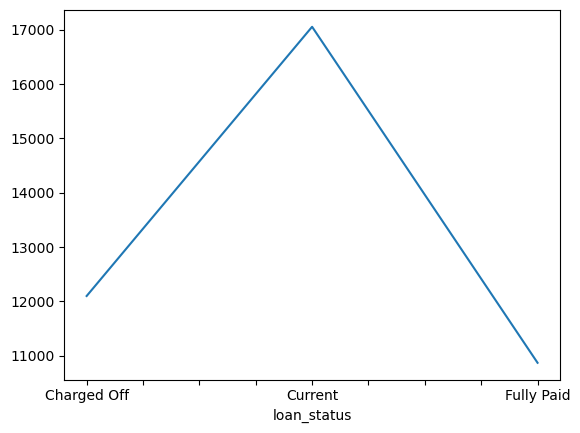

In [81]:
# Average loan amount Vs loan status
loan_stat.loan_amnt.plot()

In [82]:
data1.loan_amnt.describe()

count    39604.000000
mean     11224.438188
std       7459.104773
min       1000.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Chance of defaulting is more if loan amount > 12000

In [86]:
#Loan Purpose Vs Defaulters

loan_purp = data1[data1.loan_status == 'Charged Off'].purpose

In [93]:

loan_purp_dist = loan_purp.value_counts()
loan_purp_dist

debt_consolidation    2760
other                  631
credit_card            540
small_business         471
home_improvement       346
major_purchase         222
car                    159
medical                106
wedding                 96
moving                  91
house                   59
educational             55
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

In [94]:
#Top 10 categories of loans which are defaults
loan_purp_dist = loan_purp_dist[:10]
loan_purp_dist

debt_consolidation    2760
other                  631
credit_card            540
small_business         471
home_improvement       346
major_purchase         222
car                    159
medical                106
wedding                 96
moving                  91
Name: purpose, dtype: int64

<BarContainer object of 10 artists>

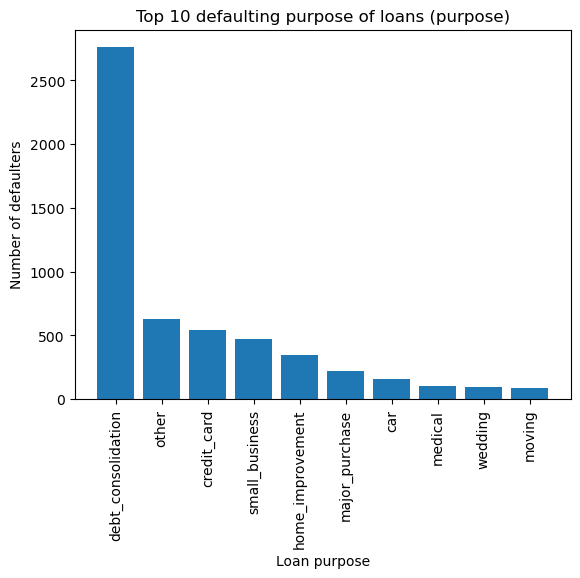

In [212]:
plt.title('Top 10 defaulting purpose of loans (purpose)')

x = loan_purp_dist.index.tolist()
y = loan_purp_dist.values.tolist()
plt.xlabel('Loan purpose')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=90)
plt.bar(x,y)

<BarContainer object of 3 artists>

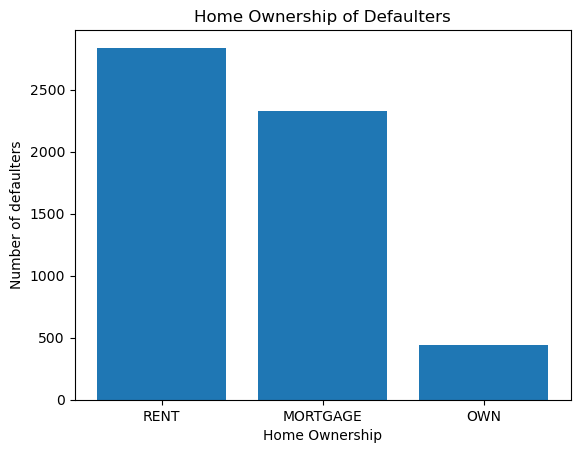

In [98]:
#Home ownership of Defaulters

loan_home_ownership = data1[data1.loan_status == 'Charged Off'].home_ownership
loan_home_ownership_dist = loan_home_ownership.value_counts()

plt.title('Home Ownership of Defaulters')

x = loan_home_ownership_dist.index.tolist()
y = loan_home_ownership_dist.values.tolist()

plt.xlabel('Home Ownership')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

<BarContainer object of 7 artists>

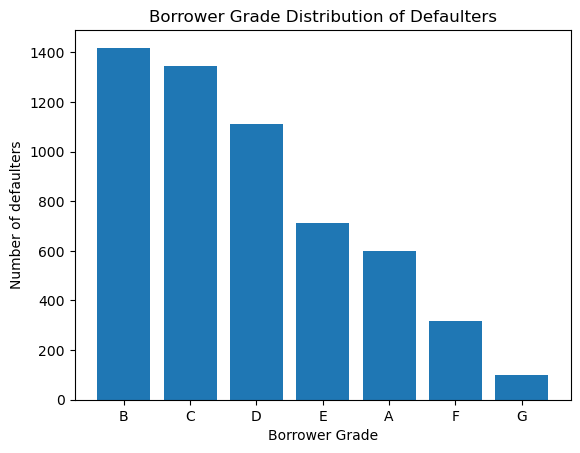

In [213]:
#Borrower grade Vs defaulters

cust_grade = data1[data1.loan_status == 'Charged Off'].grade
cust_grade_dist = cust_grade.value_counts()

plt.title('Borrower Grade Distribution of Defaulters')

x = cust_grade_dist.index.tolist()
y = cust_grade_dist.values.tolist()

plt.xlabel('Borrower Grade')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

<BarContainer object of 25 artists>

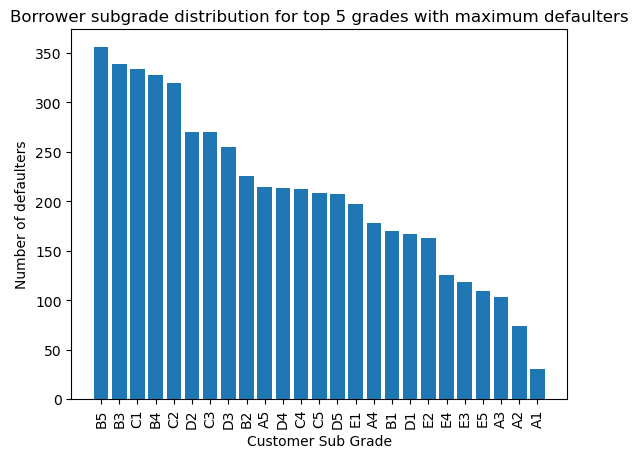

In [214]:
#Borrower subgrade distribution for top 5 grades with maximum defaulters

cust_sub_grade = data1[(data1.loan_status == 'Charged Off') & (data1.grade.isin(['A','B','C','D','E']))].sub_grade
cust_sub_grade_dist = cust_sub_grade.value_counts()

plt.title('Borrower subgrade distribution for top 5 grades with maximum defaulters')

x = cust_sub_grade_dist.index.tolist()
y = cust_sub_grade_dist.values.tolist()

plt.xlabel('Customer Sub Grade')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=90)
plt.bar(x,y)

<BarContainer object of 3 artists>

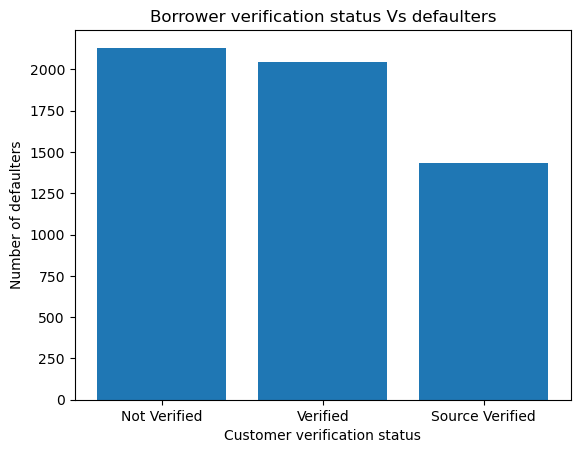

In [216]:
#Borrower verification status Vs defaulters

ver_status = data1[data1.loan_status == 'Charged Off'].verification_status
ver_status_dist = ver_status.value_counts()

plt.title('Borrower verification status Vs defaulters')

x = ver_status_dist.index.tolist()
y = ver_status_dist.values.tolist()

plt.xlabel('Customer verification status')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

<BarContainer object of 10 artists>

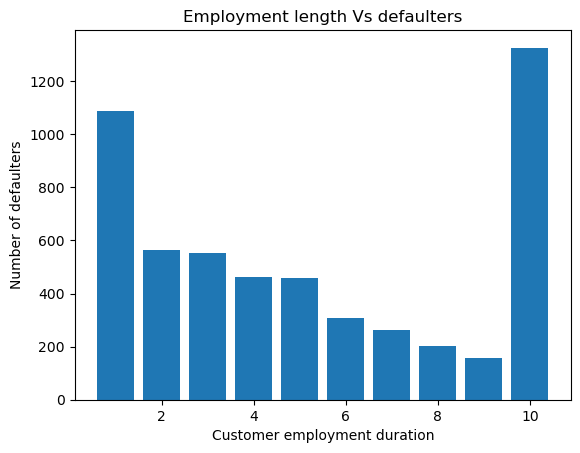

In [217]:
#Employment length Vs defaulters

emp_duration = data1[data1.loan_status == 'Charged Off'].emp_length
emp_duration_dist = emp_duration.value_counts()

plt.title('Employment length Vs defaulters')

x = emp_duration_dist.index.tolist()
y = emp_duration_dist.values.tolist()

plt.xlabel('Customer employment duration')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

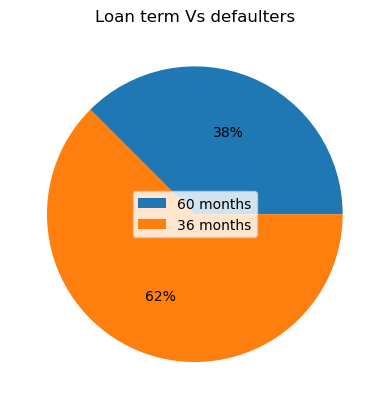

In [129]:
#Loan term Vs defaulters

loan_term = data1[data1.loan_status == 'Charged Off'].term
loan_term_dist = loan_term.value_counts()

plt.title('Loan term Vs defaulters')
plt.pie(x=loan_term_dist.index, autopct='%1.0f%%')
labels =['60 months', '36 months']
plt.legend(labels, loc="center")

In [138]:
#Pay ratio Vs loan status

pay_ratio_dist = pd.pivot_table(data1, index='loan_status', values='pay_ratio', aggfunc='mean')
pay_ratio_dist

,pay_ratio
loan_status,
Charged Off,1.286682
Current,1.399042
Fully Paid,1.210325


<Axes: xlabel='loan_status'>

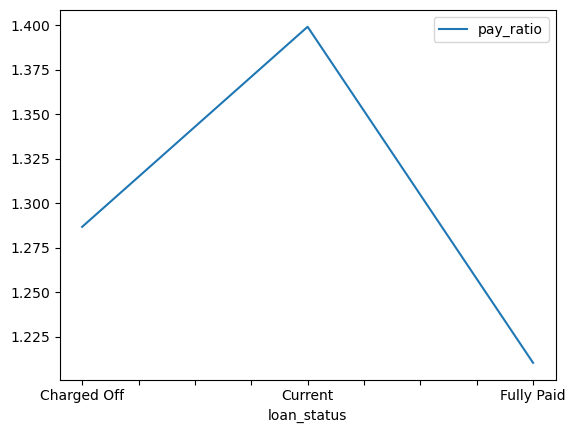

In [142]:

#plt.xticks(rotation=90)
pay_ratio_dist.plot()

In [193]:
data1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_value,inc_type,pay_ratio
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,low,low_inc,1.172664
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,low,low_inc,1.435920
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,low,low_inc,1.264950
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,low,low_inc,1.221516
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,low,low_inc,1.355800


<BarContainer object of 3 artists>

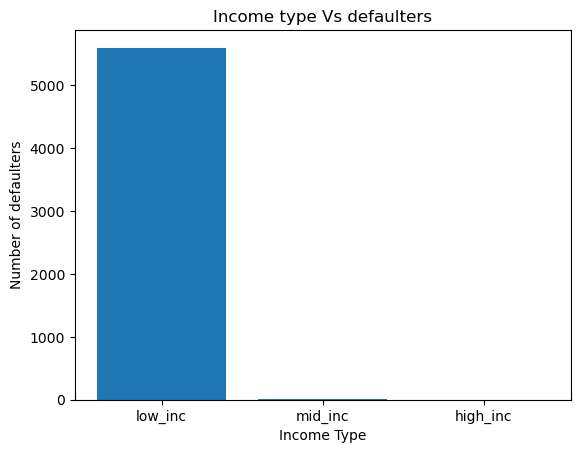

In [218]:
#Income type vs Defaulters

income_type = data1[data1.loan_status == 'Charged Off'].inc_type
income_type_dist = income_type.value_counts()

income_type_dist

plt.title('Income type Vs defaulters')

x = income_type_dist.index.tolist()
y = income_type_dist.values.tolist()

plt.xlabel('Income Type')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

In [219]:
data1.to_csv('C:\\Users\\Kiran\\Desktop\\ExPGP Ml AI\\LendingClubCaseStudy\\data1.csv')